# Exercises
 


In [16]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)
library(ISLR)

Warning message:
"package 'mlr' was built under R version 3.6.2"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.2"'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train

Warning message:
"package 'pROC' was built under R version 3.6.2"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'e1071' was built under R version 3.6.2"
Attaching package: 'e1071'

The following object is masked from 'package:mlr':

    impute

Warning message:
"packa

In [ ]:
#### Exercise 3 (p.410, Chap.10)

In [ ]:
#a

In [1]:
set.seed(1)
var = cbind(c(1, 1, 0, 5, 6, 4), c(4, 3, 4, 1, 2, 0))
var

1,4
1,3
0,4
5,1
6,2
4,0


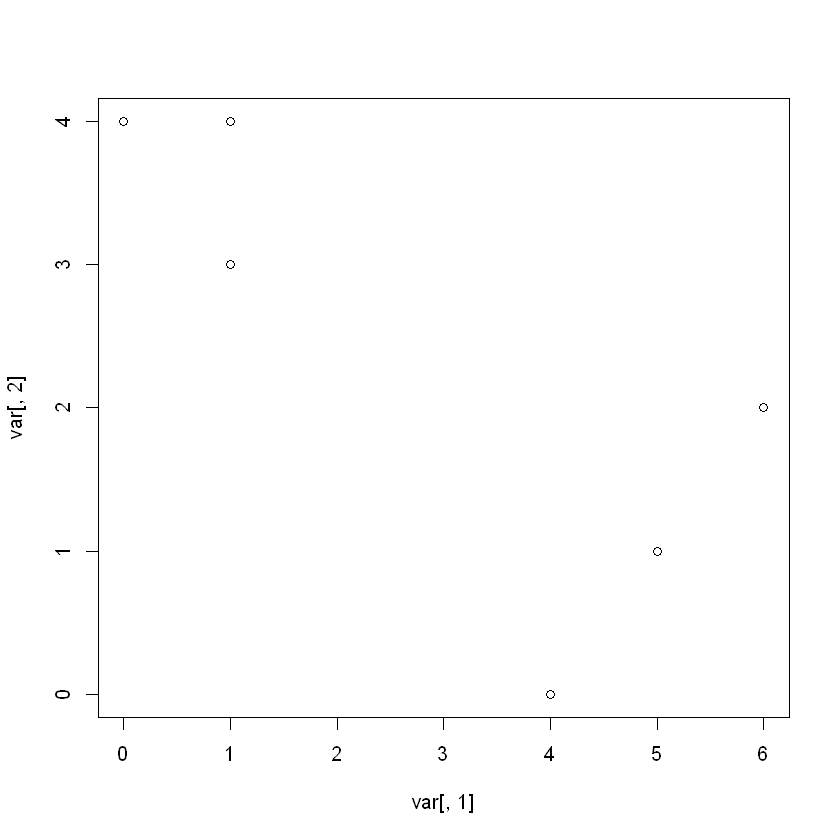

In [2]:
plot(var[,1], var[,2])

In [3]:
#b

In [4]:
labels = sample(2, nrow(var), replace=T)
labels

[1] 1 2 1 1 2 1

In [5]:
#c

In [6]:
centroid = c(mean(var[labels==1, 1]), mean(var[labels==1, 2]))
centroid_new = c(mean(var[labels==2, 1]), mean(var[labels==2, 2]))
centroid

[1] 2.50 2.25

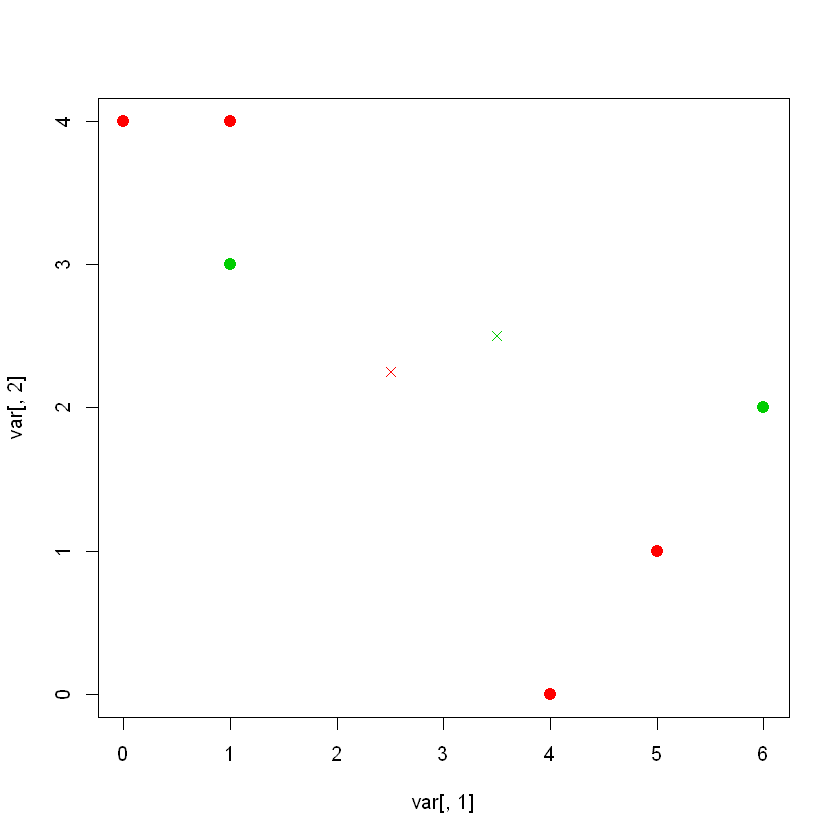

In [7]:
plot(var[,1], var[,2], col=(labels+1), pch=20, cex=2)
points(centroid[1], centroid[2], col=2, pch=4)
points(centroid_new[1], centroid_new[2], col=3, pch=4)

In [ ]:
#d

In [9]:
euclid = function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}
assign_labels = function(var, centroid, centroid_new) {
  labels = rep(NA, nrow(var))
  for (i in 1:nrow(var)) {
    if (euclid(var[i,], centroid) < euclid(var[i,], centroid_new)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}
labels = assign_labels(var, centroid, centroid_new)
labels

[1] 1 1 1 2 2 2

In [ ]:
#e

In [11]:
last_labels = rep(-1, 6)
while (!all(last_labels == labels)) {
  last_labels = labels
  centroid = c(mean(var[labels==1, 1]), mean(var[labels==1, 2]))
  centroid_new = c(mean(var[labels==2, 1]), mean(var[labels==2, 2]))
  print(centroid)
  print(centroid_new)
  labels = assign_labels(var, centroid, centroid_new)
}

[1] 0.6666667 3.6666667
[1] 5 1


In [ ]:
#f

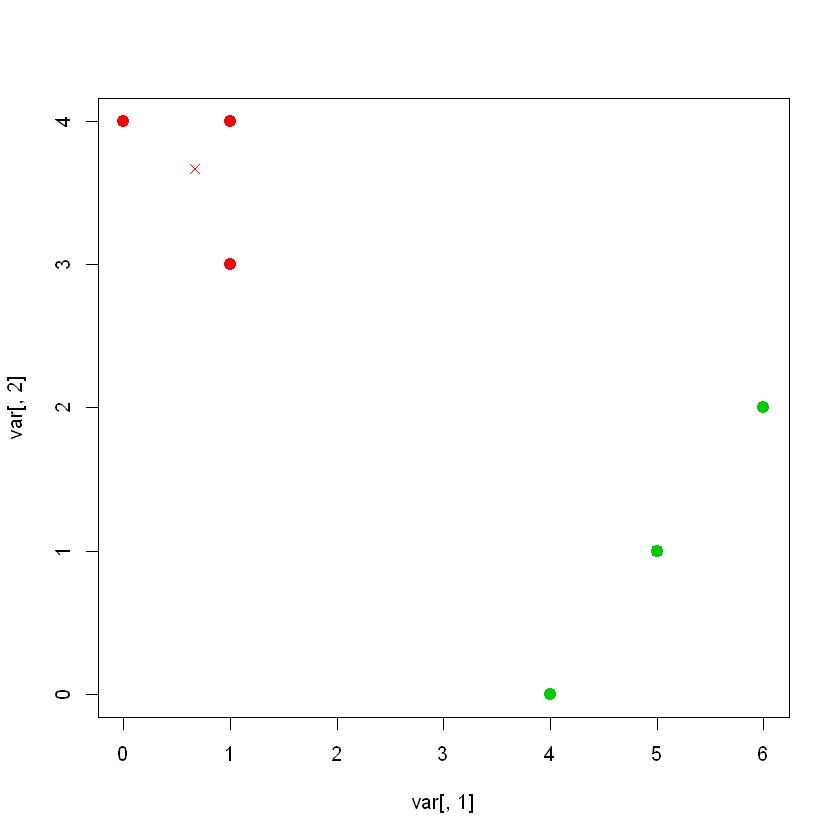

In [13]:
plot(var[,1], var[,2], col=(labels+1), pch=20, cex=2)
points(centroid[1], centroid[2], col=2, pch=4)
points(centroid_new[1], centroid_new[2], col=3, pch=4)

#### Exercise 8

In [ ]:
#1

In [17]:
arrests_prcomp = prcomp(USArrests, center=T, scale=T)
prcomp_sdev = arrests_prcomp$sdev^2
pve_prcomp = prcomp_sdev / sum(prcomp_sdev)
pve_prcomp

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [ ]:
#2

In [20]:
loadings = arrests_prcomp$rotation
pve_direct = rep(NA, 4)
dmean = apply(USArrests, 2, mean)
dsdev = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, dmean, "-")
dsc = sweep(dsc, MARGIN=2, dsdev, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve_direct[i] = sum(pc_x^2)
}
pve_direct = pve_direct/sum(dsc^2)
pve_direct

[1] 0.62006039 0.24744129 0.08914080 0.04335752

#### Exercise 9

In [ ]:
#a

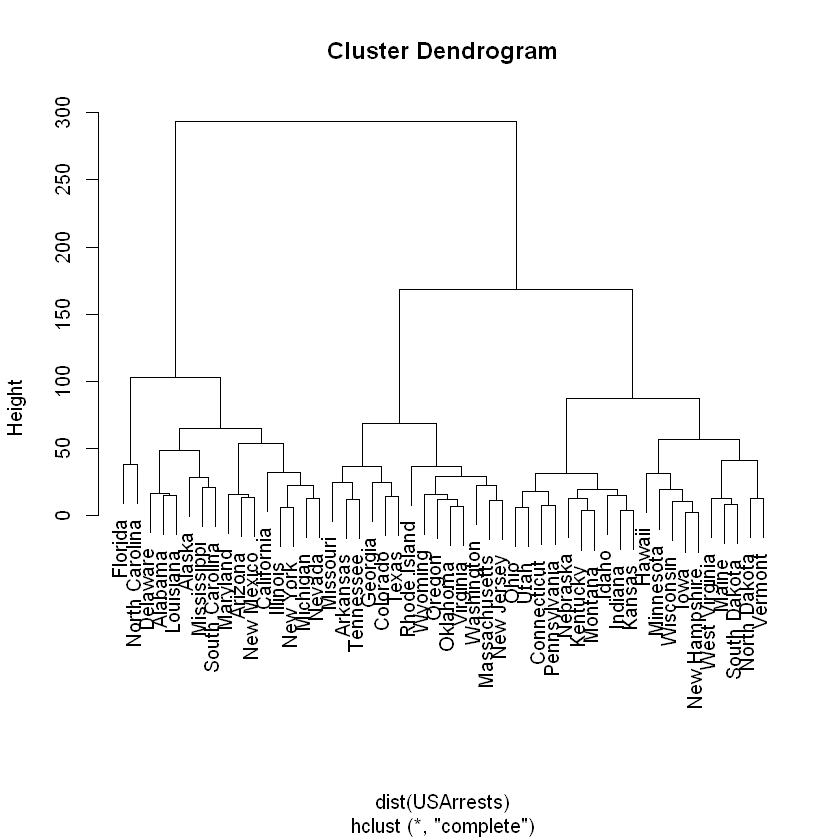

In [23]:
set.seed(120)

#create hierarchical cluster using complete linkage and euclidean distance
hierarchical_complete = hclust(dist(USArrests), method="complete")
plot(hierarchical_complete)

In [ ]:
#b

In [24]:
#states in clusters
#cut the dendrogram in 3 distinct clusters
cutree(hierarchical_complete, 3)



Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

In [ ]:
#c

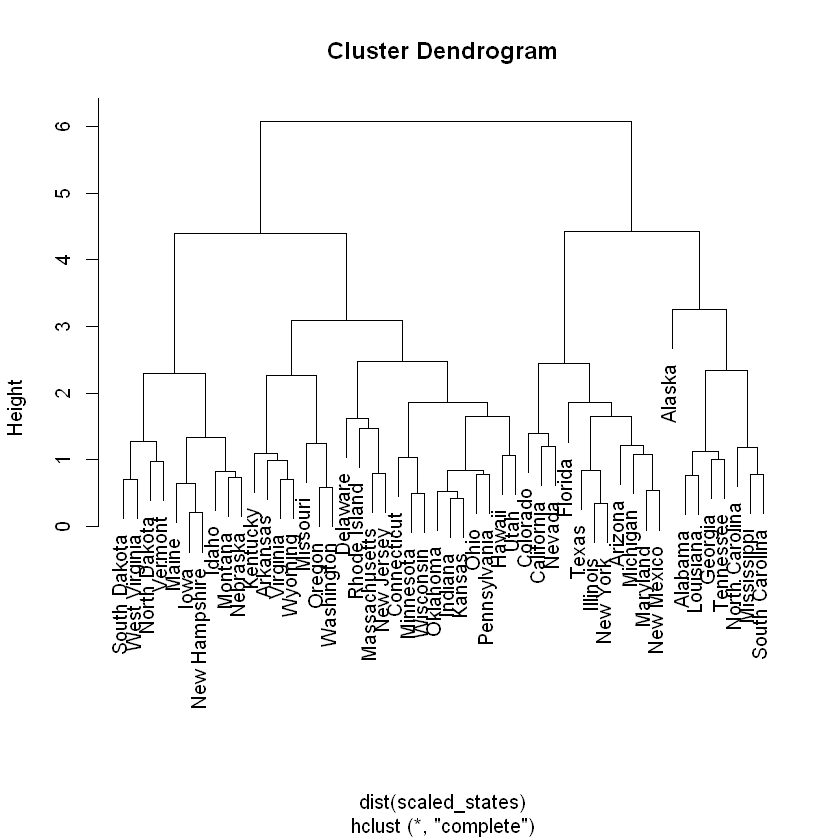

In [27]:
# scale the data
scaled_states = scale(USArrests)

#hierarchical clustering with complete linkage and euclidean distance
scaled_states_euclidean = hclust(dist(scaled_states), method="complete")
plot(scaled_states_euclidean)

In [ ]:
#d

In [28]:
cutree(scaled_states_euclidean, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [34]:
#the initial cluster
sum(cutree(hierarchical_complete, 3))

[1] 104

In [36]:
table(cutree(hierarchical_complete, 3))


 1  2  3 
16 14 20 

In [35]:
#the scaled cluster
sum(cutree(scaled_states_euclidean, 3))

[1] 123

In [37]:
table(cutree(scaled_states_euclidean, 3))


 1  2  3 
 8 11 31 

In [ ]:
#I believe the variables should not be scaled before the inter observation
#dissimilarities are computed.
#Because as you can see above the scaled cluster has changed the propotional size of the variables


#### Exercise 10

In [ ]:
#a

In [ ]:
set.seed(120)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1

In [ ]:
#b

In [ ]:
pca_cluster = prcomp(x)
summary(pca_cluster)

In [ ]:
pca_cluster$x[,1:2]

In [ ]:
plot(pca_cluster$x[,1:2], col=2:4, xlab="Z1", ylab="Z2", pch=19) 

In [ ]:
#c

In [ ]:
kmeans_cluster = kmeans(x, 3, nstart=20)
table(kkmeans_cluster$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

In [ ]:
#d

In [ ]:
kmeans_cluster = kmeans(x, 2, nstart=20)
kmeans_cluster$cluster

In [ ]:
#e

In [ ]:
kmeans_cluster = kmeans(x, 4, nstart=20)
kmeans_cluster$cluster

In [ ]:
#f

In [ ]:
kmeans_cluster = kmeans(pca.out$x[,1:2], 3, nstart=20)
table(kmeans_cluster$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

In [ ]:
#g

In [ ]:
kmeans_cluster = kmeans(scale(x), 3, nstart=20)
kmeans_cluster$cluster

In [ ]:
#It can be seen that the scaling of the observations effects the distance between them.